In [ ]:
import nltk
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer # Exploring
from nltk.stem import SnowballStemmer
import spacy
import re
from nltk.corpus import wordnet as wn
from collections import defaultdict
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# fake-news data set
true_news_df = pd.read_csv("/content/drive/MyDrive/Thesis/True.csv")
fake_news_df = pd.read_csv("/content/drive/MyDrive/Thesis/Fake.csv")

fake_news_df["label"] = 0
true_news_df["label"] = 1

num_true = true_news_df.shape[0]
num_fake = fake_news_df.shape[0]
target_size = min(num_true, num_fake)

if num_true > num_fake:
    true_news_df = true_news_df.sample(n=target_size, random_state=42)  # Random state for reproducibility
else:
    fake_news_df = fake_news_df.sample(n=target_size, random_state=42)


data = pd.concat([true_news_df, fake_news_df])
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
#data.head()
#data = data.drop(index= [329, 6464, 335, 6463, 6466, 6468,6469,6470,6471,6472,6473,6474,6475,6476,6477,6478,6479,6480,6482,6483,6484,6485,6486,6487,6488, 6489], axis = 1)

In [ ]:
data.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import re # regex
from wordcloud import WordCloud
import seaborn as sns


In [ ]:
#data = data.drop('Unnamed: 0', axis = 1)
data.dropna(inplace = True)

<Axes: xlabel='label', ylabel='count'>

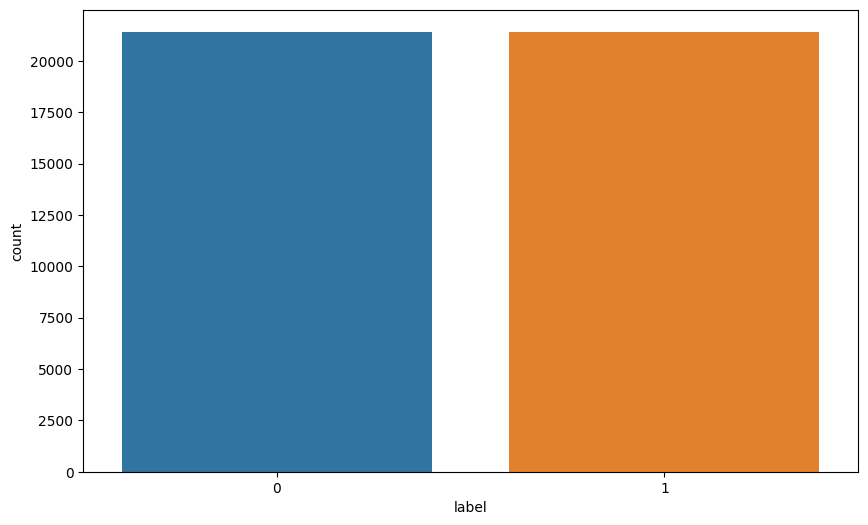

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'label',data=data)

In [ ]:

indices = (data['label'] == ' is just unbelievably rich from North Sea oil. ').any() #using any to find index positions
data.drop(columns=data.columns[(data == ' is just unbelievably rich from North Sea oil. ').any()])
print(data['label'].value_counts())

1    21417
0    21417
Name: label, dtype: int64


In [ ]:
data['label'].value_counts()


1    21417
0    21417
Name: label, dtype: int64

In [ ]:
import string
def remove_special(text):
      if isinstance(text, str):
        text = text.lower()  # Convert text to lower case
        # Combine multiple re.sub() calls into a single call for efficiency
        # This pattern removes URLs, HTML tags, numbers mixed with words, and punctuation
        pattern = r'\[.*?\]|https?://\S+|www\.\S+|<.*?>+|\w*\d\w*|[%s]' % re.escape(string.punctuation)
        text = re.sub(pattern, ' ', text)
        # Replace non-word characters (excluding space) with a space
        text = re.sub(r'\W+', ' ', text)
        # Remove newlines
        text = text.replace('\n', ' ')
        return text.strip()  # Remove leading/trailing whitespace
data["text"] = data["text"].apply(remove_special)

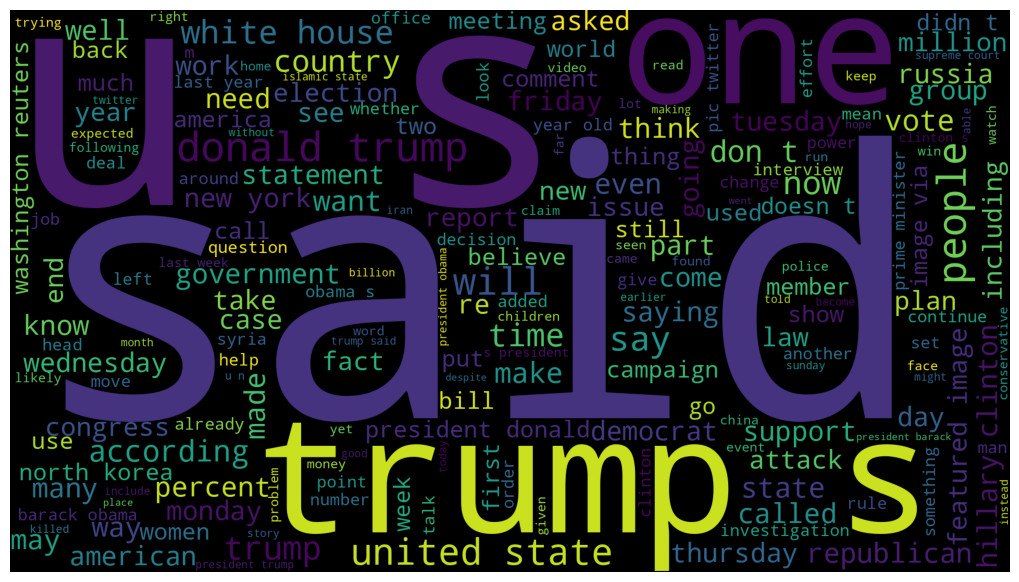

In [ ]:
wcText = ''.join(str(data['text'].tolist()))
wordcloud = WordCloud(width=1920, height = 1080).generate(wcText)
figure = plt.figure(figsize=(10,10))
plt.imshow(wordcloud) # viusalize wordlcoud
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
data.info

<bound method DataFrame.info of                                                    title  \
0      At least 12 dead in bus crash on excursion to ...   
1      SHOCKING AUDIO RELEASED Of John Kerry Discussi...   
2      Commandos storm plane in Philippines-U.S. hija...   
3      U.S. to decide soon on future of Taliban offic...   
4      U.N. urges Bangladesh to move Rohingya refugee...   
...                                                  ...   
42829  New York protesters camp out at Goldman Sachs ...   
42830  Nigeria says U.S. agrees delayed $593 million ...   
42831  HUH? GERMANS BOMBED PEARL HARBOR? Congressman ...   
42832  Republican tax plan would deal financial hit t...   
42833  U.N. refugee commissioner says Australia must ...   

                                                    text       subject  \
0      mexico city reuters twelve people died and wer...     worldnews   
1      what s worse is the second longer version of t...      politics   
2      manila reuters phi

In [ ]:
data.head()

,title,text,subject,date,label
0,At least 12 dead in bus crash on excursion to ...,mexico city reuters twelve people died and wer...,worldnews,"December 19, 2017",1
1,SHOCKING AUDIO RELEASED Of John Kerry Discussi...,what s worse is the second longer version of t...,politics,"Jan 3, 2017",0
2,Commandos storm plane in Philippines-U.S. hija...,manila reuters philippine commandos and law en...,worldnews,"September 26, 2017",1
3,U.S. to decide soon on future of Taliban offic...,washington reuters the united states will soon...,worldnews,"October 3, 2017",1
4,U.N. urges Bangladesh to move Rohingya refugee...,geneva reuters the u n refugee agency urged ba...,worldnews,"October 17, 2017",1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42834 entries, 0 to 42833
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    42834 non-null  object
 1   text     42834 non-null  object
 2   subject  42834 non-null  object
 3   date     42834 non-null  object
 4   label    42834 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
data['text']
data['text'].dropna(inplace=True)

In [ ]:
print(data['text'])

0        mexico city reuters twelve people died and wer...
1        what s worse is the second longer version of t...
2        manila reuters philippine commandos and law en...
3        washington reuters the united states will soon...
4        geneva reuters the u n refugee agency urged ba...
                               ...                        
42829    new york reuters dozens of protesters gathered...
42830    abuja reuters the united states has formally a...
42831    the video from is a little blurry but the audi...
42832    washington reuters the republican tax plan unv...
42833    sydney reuters the u n high commissioner for r...
Name: text, Length: 42834, dtype: object


In [ ]:
text = data.drop(['label'], axis = 1)

In [ ]:
text.head()

,title,text,subject,date
0,At least 12 dead in bus crash on excursion to ...,mexico city reuters twelve people died and wer...,worldnews,"December 19, 2017"
1,SHOCKING AUDIO RELEASED Of John Kerry Discussi...,what s worse is the second longer version of t...,politics,"Jan 3, 2017"
2,Commandos storm plane in Philippines-U.S. hija...,manila reuters philippine commandos and law en...,worldnews,"September 26, 2017"
3,U.S. to decide soon on future of Taliban offic...,washington reuters the united states will soon...,worldnews,"October 3, 2017"
4,U.N. urges Bangladesh to move Rohingya refugee...,geneva reuters the u n refugee agency urged ba...,worldnews,"October 17, 2017"


In [ ]:
label = data['label']

In [ ]:
print(label.head())

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64


In [ ]:
text['text'] = [str(entry).lower() for entry in text['text']]

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))
#text['text'] = [word_tokenize(entry) for entry in text['text'] if not entry.lower() in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(type(text['text'][0]))

<class 'str'>


In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'\W', ' ', str(text))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and stem
    stop_words = set(stopwords.words('english'))
    stemmer = SnowballStemmer('english')
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [ ]:
data['text'] = data['text'].fillna('')
data['title'] = data['title'].fillna('')

In [ ]:
data['combined_text'] = data['title'] + ' ' + data['text']

In [ ]:
data['combined_text'].apply(preprocess_text)

0        least 12 dead bus crash excurs mexican ruin me...
1        shock audio releas john kerri discuss obama al...
2        commando storm plane philippin u hijack simul ...
3        u decid soon futur taliban offic qatar washing...
4        u n urg bangladesh move rohingya refuge strand...
                               ...                        
42829    new york protest camp goldman sach oppos trump...
42830    nigeria say u agre delay 593 million fighter p...
42831    huh german bomb pearl harbor congressman dnc c...
42832    republican tax plan would deal financi hit u u...
42833    u n refuge commission say australia must stop ...
Name: combined_text, Length: 42834, dtype: object

In [ ]:
print(text['text'])

0        mexico city reuters twelve people died and wer...
1        what s worse is the second longer version of t...
2        manila reuters philippine commandos and law en...
3        washington reuters the united states will soon...
4        geneva reuters the u n refugee agency urged ba...
                               ...                        
42829    new york reuters dozens of protesters gathered...
42830    abuja reuters the united states has formally a...
42831    the video from is a little blurry but the audi...
42832    washington reuters the republican tax plan unv...
42833    sydney reuters the u n high commissioner for r...
Name: text, Length: 42834, dtype: object


In [ ]:
print(text['text'].shape)
print(label.shape)
text['text'].reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)

(42834,)
(42834,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine title and text for more context


# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.05, ngram_range=(1,3))
X = tfidf_vectorizer.fit_transform(data['combined_text'])
# Fit and transform the combined text
y = data['label']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
from sklearn.model_selection import GridSearchCV

#parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
#nb_grid = GridSearchCV(MultinomialNB(), parameters, cv=5)
#nb_grid.fit(X_train, y_train)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

model = MultinomialNB(alpha=0.001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Use the best estimator
#nb_classifier = nb_grid.best_estimator_


# Predict on the test set

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9489903116610249
[[3928  277]
 [ 160 4202]]


In [ ]:
import pickle

#pickle.dump(tfidf_vectorizer, open('nb_vect.pkl', 'wb'))
#pickle.dump(nb_classifier, open('nb_model.pkl', 'wb'))

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

# Assuming the necessary NLTK data has already been downloaded
def preprocess_text2(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and stem the words
    stop_words = set(stopwords.words('english'))
    stemmer = SnowballStemmer('english')
    filtered_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words and len(word) > 1]

    return ' '.join(filtered_tokens)

def classify_article(article, model, vectorizer):
    # Check if the article is not empty or None
    if not article or article.isspace():
        return "Invalid input - article is empty or not provided."

    # Preprocess the article
    preprocessed_article = preprocess_text2(article)

    # Check if preprocessing results in an empty string
    if not preprocessed_article or preprocessed_article.isspace():
        return "Invalid input - preprocessing resulted in empty content."

    # Vectorize the preprocessed article
    article_vector = vectorizer.transform([preprocessed_article])

    # Predict using the model
    prediction = model.predict(article_vector)

    # Return the prediction with a more descriptive message
    return "Real News" if prediction[0] == 1 else "Fake News"
